# Numpy + Pandas + Matplotlib Crash

- Machine Learning 과 Data 분석에 사용되는 파이썬의 3총사 라이브러리

## 1. Numpy 

- 수치 data 를 다루는데 효율적이고 높은 성능 제공

- 각종 수학적 함수 제공

In [1]:
import numpy as np

# 벡터
x = np.array([1,2,3])
print(x)

[1 2 3]


In [2]:
# matrix
y = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(y)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
print(y[:2, 1:])

[[2 3]
 [5 6]]


## 2. Pandas 

- pandas는 Series data type 과 DataFrame data type 으로 구성된다.

### Series (1 차원) : numpy array 와 유사. 
- 차이점 - numpy 와 달리 Series 는 axis (행, 열)에 label 을 부여할 수 있다. 즉, numpy 와 같이 숫자로만 indexing 하는 것이 아니라 label 명으로 indexing 을 할 수 있다. 또한 숫자 뿐 아니라 임의의 Python object 를 모두 element 로 가질 수 있다.


### DataFrame (2차원, table)
- Python program 안의 Excel

### Series vs DataFrame
<img src="series-and-dataframe.width-1200.png" width="600">


<img src="base_01_pandas_5_0.png" width="600">

### DataFrame 

DataFrame 은 여러개의 Series 를 같은 index 기준으로 모아 Table 을 만든 것이다.

In [5]:
import pandas as pd

np.random.seed(101)
data = np.random.randn(5, 4)

In [6]:
df = pd.DataFrame(data, columns=['W', 'X', 'Y', 'Z'])
df

,W,X,Y,Z
0,2.706850,0.628133,0.907969,0.503826
1,0.651118,-0.319318,-0.848077,0.605965
2,-2.018168,0.740122,0.528813,-0.589001
3,0.188695,-0.758872,-0.933237,0.955057
4,0.190794,1.978757,2.605967,0.683509


### dataframe 의 column 명

In [7]:
df.columns

Index(['W', 'X', 'Y', 'Z'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       5 non-null      float64
 1   X       5 non-null      float64
 2   Y       5 non-null      float64
 3   Z       5 non-null      float64
dtypes: float64(4)
memory usage: 288.0 bytes


In [9]:
df.describe()

,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000
mean,0.343858,0.453764,0.452287,0.431871
std,1.681131,1.061385,1.454516,0.594708
min,-2.018168,-0.758872,-0.933237,-0.589001
25%,0.188695,-0.319318,-0.848077,0.503826
50%,0.190794,0.628133,0.528813,0.605965
75%,0.651118,0.740122,0.907969,0.683509
max,2.706850,1.978757,2.605967,0.955057


### DataFrame indexing

In [10]:
df['W']

0    2.706850
1    0.651118
2   -2.018168
3    0.188695
4    0.190794
Name: W, dtype: float64

In [11]:
type(df['W'])

pandas.core.series.Series

In [12]:
df[['W', 'Z']]

,W,Z
0,2.706850,0.503826
1,0.651118,0.605965
2,-2.018168,-0.589001
3,0.188695,0.955057
4,0.190794,0.683509


In [13]:
df.W

0    2.706850
1    0.651118
2   -2.018168
3    0.188695
4    0.190794
Name: W, dtype: float64

### new column 추가/삭제

In [14]:
df['new'] = df['W'] + df['X']
df

,W,X,Y,Z,new
0,2.706850,0.628133,0.907969,0.503826,3.334983
1,0.651118,-0.319318,-0.848077,0.605965,0.331800
2,-2.018168,0.740122,0.528813,-0.589001,-1.278046
3,0.188695,-0.758872,-0.933237,0.955057,-0.570177
4,0.190794,1.978757,2.605967,0.683509,2.169552


In [15]:
df.drop('new', axis=1)

,W,X,Y,Z
0,2.706850,0.628133,0.907969,0.503826
1,0.651118,-0.319318,-0.848077,0.605965
2,-2.018168,0.740122,0.528813,-0.589001
3,0.188695,-0.758872,-0.933237,0.955057
4,0.190794,1.978757,2.605967,0.683509


In [16]:
df

,W,X,Y,Z,new
0,2.706850,0.628133,0.907969,0.503826,3.334983
1,0.651118,-0.319318,-0.848077,0.605965,0.331800
2,-2.018168,0.740122,0.528813,-0.589001,-1.278046
3,0.188695,-0.758872,-0.933237,0.955057,-0.570177
4,0.190794,1.978757,2.605967,0.683509,2.169552


In [17]:
df.drop('new', axis=1, inplace=True)
df

,W,X,Y,Z
0,2.706850,0.628133,0.907969,0.503826
1,0.651118,-0.319318,-0.848077,0.605965
2,-2.018168,0.740122,0.528813,-0.589001
3,0.188695,-0.758872,-0.933237,0.955057
4,0.190794,1.978757,2.605967,0.683509


In [18]:
df.shape

(5, 4)

### Missing Data 처리

- missing data 가 있는 row 혹은 columns 을 완전히 삭제 : dropna()
- 임의의 data 로 대체 : fillna()

In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.DataFrame({'A': [1, 2, np.nan],
                               'B': [5, np.nan, np.nan],
                               'C': [1, 2, 3]})

In [23]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


### missing value 를 포함하고 있는 모든 row 삭제 - default

In [24]:
df.dropna()

,A,B,C
0,1.0,5.0,1


### missing value 를 포함하고 있는 모든 column 삭제

In [25]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


### missing value 대체

In [26]:
df.fillna(value=0)

,A,B,C
0,1.0,5.0,1
1,2.0,0.0,2
2,0.0,0.0,3


In [27]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

### excel file handling

In [28]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Matplotlib

**pyplot 의 object 구성**

<center><img src="fig_map.webp" width="350"/></center>

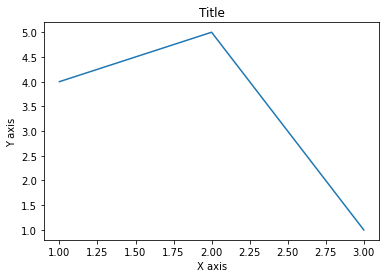

In [32]:
from matplotlib import pyplot as plt

plt.plot([1,2,3],[4,5,1])
plt.title('Title')
plt.ylabel('Y axis')
plt.xlabel('X axis')

plt.show()

Text(0.5, 0, 'X axis')

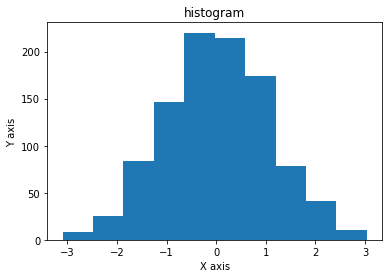

In [33]:
x = np.random.randn(1000)

plt.hist(x, bins=10)

plt.title('histogram')
plt.ylabel('Y axis')
plt.xlabel('X axis')

## Pandas를 활용한 통계 기초 및 시각화

### 주사위 게임

2개의 주사위를 굴린 결과를 모방하므로 다른 결과를 얻을 수 있지만 범위는 2에서 12 사이로 제한되어야 합니다.

In [34]:
# 주사위
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
die

,0
0,1
1,2
2,3
3,4
4,5
5,6


두개의 주사위를 던진다 -> 1~6 숫자를 두번 복원 추출.

In [35]:
die.sample(2, replace=True)

,0
5,6
1,2


In [37]:
# 두 주사위의 합계
die.sample(2, replace=True).sum()

0    5
dtype: int64

In [44]:
# 3개의 주사위 던지기 모사

sum_of_three_dice = die.sample(3, replace=True).sum().loc[0]
print('Sum of three dice is', sum_of_three_dice)

Sum of three dice is 8
